In [21]:
from pathlib import Path
import pandas as pd 
from trialexp.process.pycontrol.event_filters import extract_event_time, get_first_spout, extract_trial_time
import matplotlib.pyplot as plt
import numpy as np 


## Loading data

In [2]:
# Load the event dataframe from the pipeline

#data path, you need to change it to the correct path on your computer
path = Path(r'\\ettin\Magill_Lab\Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/RE602-2023-03-20-145614/processed/df_events_cond.pkl')
df_event = pd.read_pickle(path)

#an overview of the dataframe structure
df_event.head()

,type,name,time,duration,value,trial_nb,trial_time,trigger_x,uid,trigger_y,...,water_on,water by bar_off,water by spout,water for free,water success,busy_win_timer,spout,button_press,waiting_for_spout,success
0,event,bar,19852.0,NaN,NaN,1.0,-2000.0,hold_for_water,RE602_2023-03-20_14:56:14_1,hold_for_water,...,False,False,False,False,False,False,False,False,True,False
1,state,hold_for_water,21852.0,1000.0,NaN,1.0,0.0,hold_for_water,RE602_2023-03-20_14:56:14_1,hold_for_water,...,False,False,False,False,False,False,False,False,True,False
2,state,waiting_for_spout,22852.0,6002.0,NaN,1.0,1000.0,hold_for_water,RE602_2023-03-20_14:56:14_1,hold_for_water,...,False,False,False,False,False,False,False,False,True,False
3,state,hold_for_water,43426.0,1000.0,NaN,2.0,0.0,hold_for_water,RE602_2023-03-20_14:56:14_2,hold_for_water,...,False,False,False,False,False,False,False,True,True,False
4,state,waiting_for_spout,44426.0,3476.0,NaN,2.0,1000.0,hold_for_water,RE602_2023-03-20_14:56:14_2,hold_for_water,...,False,False,False,False,False,False,False,True,True,False


## Writing the event extraction function

In [3]:
df_trial = df_event[df_event.trial_nb==2] 
def get_us_timer_delay(df_trial):
    # df_trial is a dataframe of a single trial
    # it needs to return a row of the original dataframe
    us_timer_delay = df_trial[df_trial['name'] == 'US_end_timer']
    
    if len(us_timer_delay) > 0:
        return us_timer_delay.iloc[0]
    
get_us_timer_delay(df_trial)

type                                       event
name                                US_end_timer
time                                     46950.0
duration                                     NaN
value                                        NaN
trial_nb                                     2.0
trial_time                                3524.0
trigger_x                         hold_for_water
uid                  RE602_2023-03-20_14:56:14_2
trigger_y                         hold_for_water
valid                                       True
break_after_abort                          False
US_end_timer                                True
water_on                                   False
water by bar_off                           False
water by spout                             False
water for free                             False
water success                              False
busy_win_timer                             False
spout                                      False
button_press        

In [4]:
df_trial

,type,name,time,duration,value,trial_nb,trial_time,trigger_x,uid,trigger_y,...,water_on,water by bar_off,water by spout,water for free,water success,busy_win_timer,spout,button_press,waiting_for_spout,success
3,state,hold_for_water,43426.0,1000.0,NaN,2.0,0.0,hold_for_water,RE602_2023-03-20_14:56:14_2,hold_for_water,...,False,False,False,False,False,False,False,True,True,False
4,state,waiting_for_spout,44426.0,3476.0,NaN,2.0,1000.0,hold_for_water,RE602_2023-03-20_14:56:14_2,hold_for_water,...,False,False,False,False,False,False,False,True,True,False
5,event,button_press,46910.0,NaN,NaN,2.0,3484.0,hold_for_water,RE602_2023-03-20_14:56:14_2,hold_for_water,...,False,False,False,False,False,False,False,True,True,False
6,event,US_end_timer,46950.0,NaN,NaN,2.0,3524.0,hold_for_water,RE602_2023-03-20_14:56:14_2,hold_for_water,...,False,False,False,False,False,False,False,True,True,False


In [5]:
#df_trial = df_event[df_event.trial_nb==2] #selecting one trial from all the events

#def get_spout(df_trial):
    #df_trial is a dataframe of a single trial
    # it needs to return a row of original dataframe
    # spout =  df_trial[df_trial['name']=='spout']
    
    # if len(spout) >0:
    #     return spout.iloc[0]

#get_spout(df_trial)

IndentationError: unexpected indent (3500670542.py, line 6)

In [6]:
us_delay_timer = df_trial[df_trial['name'] == 'us_delay_timer']


## Actual usage in pipeline

In [9]:
trial_time = extract_trial_time(df_event, get_us_timer_delay, {})

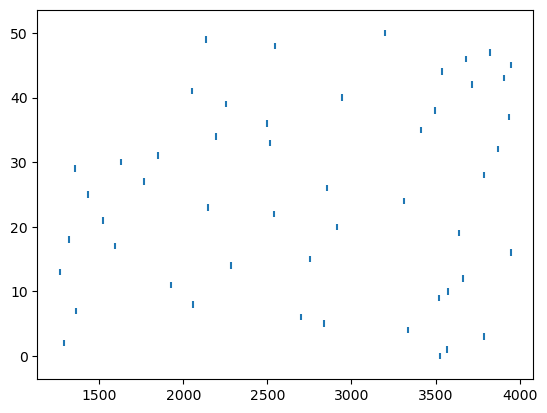

In [22]:
plt.eventplot([[i] for i in trial_time.values if not np.isnan(i)]);